# Task


## Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [41]:
data  = pd.read_csv('student_engagement_data_10000.csv')

## Describe data using .info() method

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Internet Connectivity     10000 non-null  object
 5   Learning Mode Prediction  10000 non-null  object
 6   Performance Metrics       10000 non-null  int64 
 7   Engagement Level          10000 non-null  int64 
 8   Attention Level           10000 non-null  int64 
 9   Engagement Level          10000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 781.4+ KB


## Describe data using .Describe() method

In [43]:
data.describe()

,Student ID,Session ID,Performance Metrics,Engagement Level,Attention Level,Engagement Level
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,5000.50000,149.762700,74.674300,1.991100,2.001900,1.9978
std,2886.89568,28.783232,14.383404,0.815038,0.813365,0.8149
min,1.00000,100.000000,50.000000,1.000000,1.000000,1.0000
25%,2500.75000,125.000000,62.000000,1.000000,1.000000,1.0000
50%,5000.50000,150.000000,75.000000,2.000000,2.000000,2.0000
75%,7500.25000,174.000000,87.000000,3.000000,3.000000,3.0000
max,10000.00000,199.000000,99.000000,3.000000,3.000000,3.0000


## Count nan Values in each coloumns

In [5]:
data.isna().sum()

<<<---Count nan Values in each coloumns--->>>





Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

## Value counts of categorical columns like learning_mode, student_id, etc.

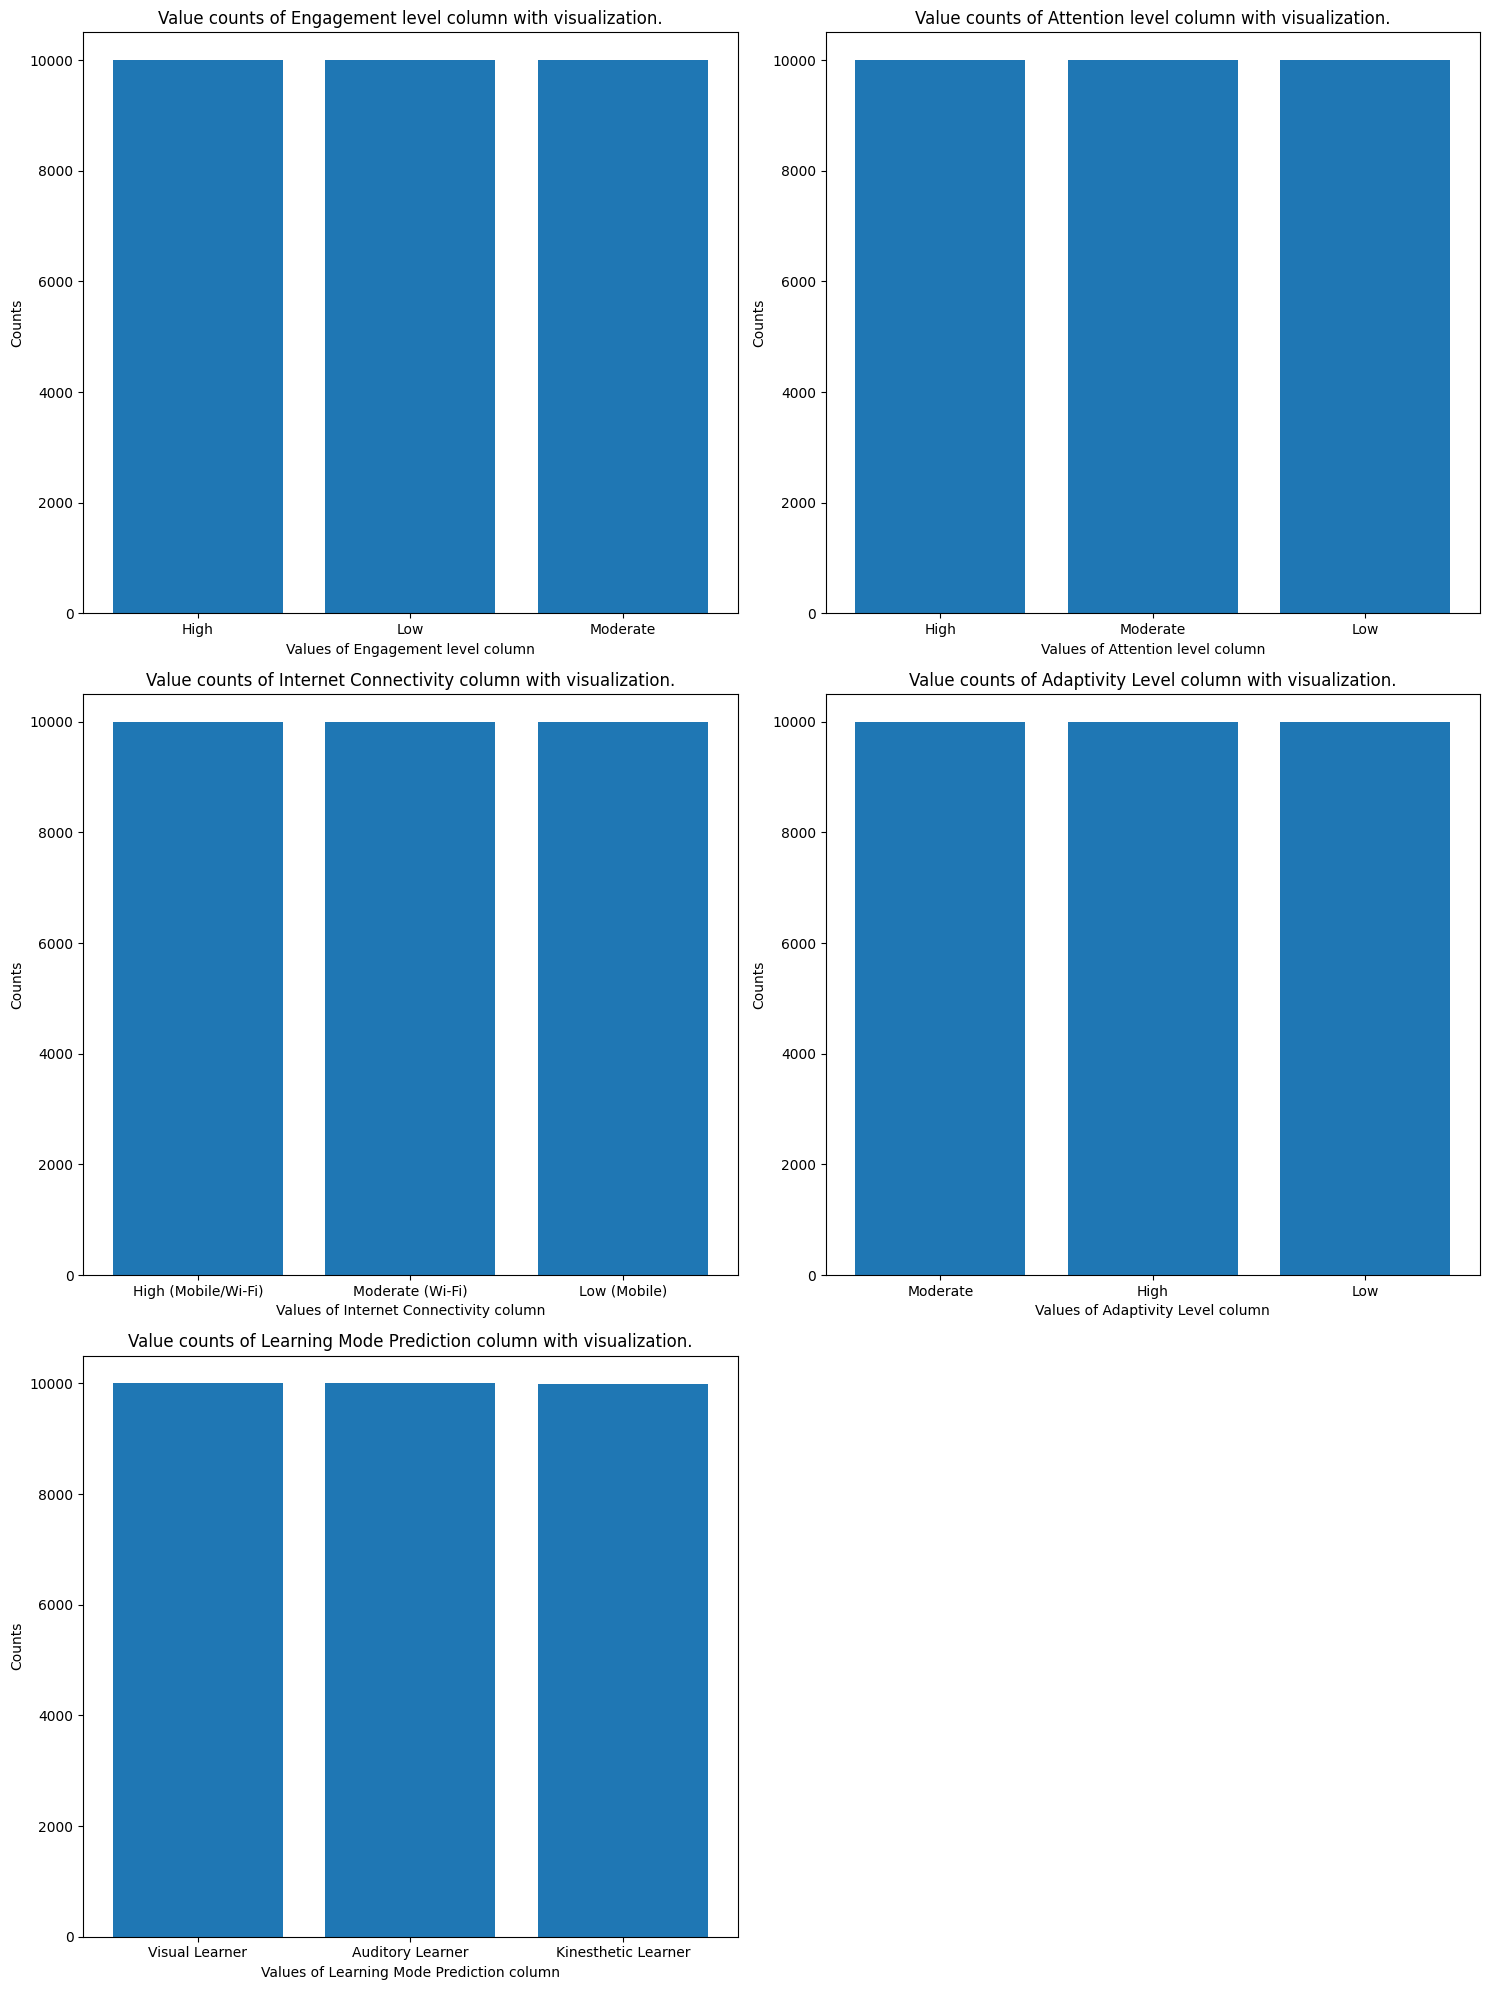

In [7]:
x = data['Engagement Level']
y = data['Student ID']


plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
plt.bar(x,y)
plt.title('Value counts of Engagement level column with visualization.')
plt.xlabel('Values of Engagement level column')
plt.ylabel('Counts')




x = data['Attention Level']
y = data['Student ID']

plt.subplot(3,2,2)
plt.bar(x,y)
plt.title('Value counts of Attention level column with visualization.')
plt.xlabel('Values of Attention level column')
plt.ylabel('Counts')



x = data['Internet Connectivity']
y = data['Student ID']

plt.subplot(3,2,3)
plt.bar(x,y)
plt.title('Value counts of Internet Connectivity column with visualization.')
plt.xlabel('Values of Internet Connectivity column')
plt.ylabel('Counts')



x = data['Adaptivity Level']
y = data['Student ID']

plt.subplot(3,2,4)
plt.bar(x,y)
plt.title('Value counts of Adaptivity Level column with visualization.')
plt.xlabel('Values of Adaptivity Level column')
plt.ylabel('Counts')



x = data['Learning Mode Prediction']
y = data['Student ID']

plt.subplot(3,2,5)
plt.bar(x,y)
plt.title('Value counts of Learning Mode Prediction column with visualization.')
plt.xlabel('Values of Learning Mode Prediction column')
plt.ylabel('Counts')



plt.tight_layout()
plt.show()

## Plot line charts for daily trends.

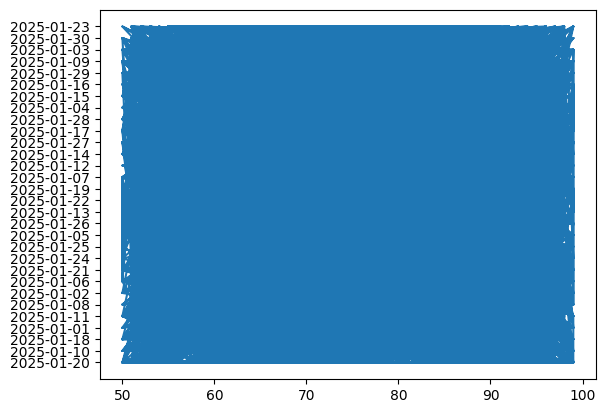

In [6]:
plt.close()

x = data['Performance Metrics']
y = data['Date']

plt.plot(x,y)
plt.show()

## A bar chart to compare modes.

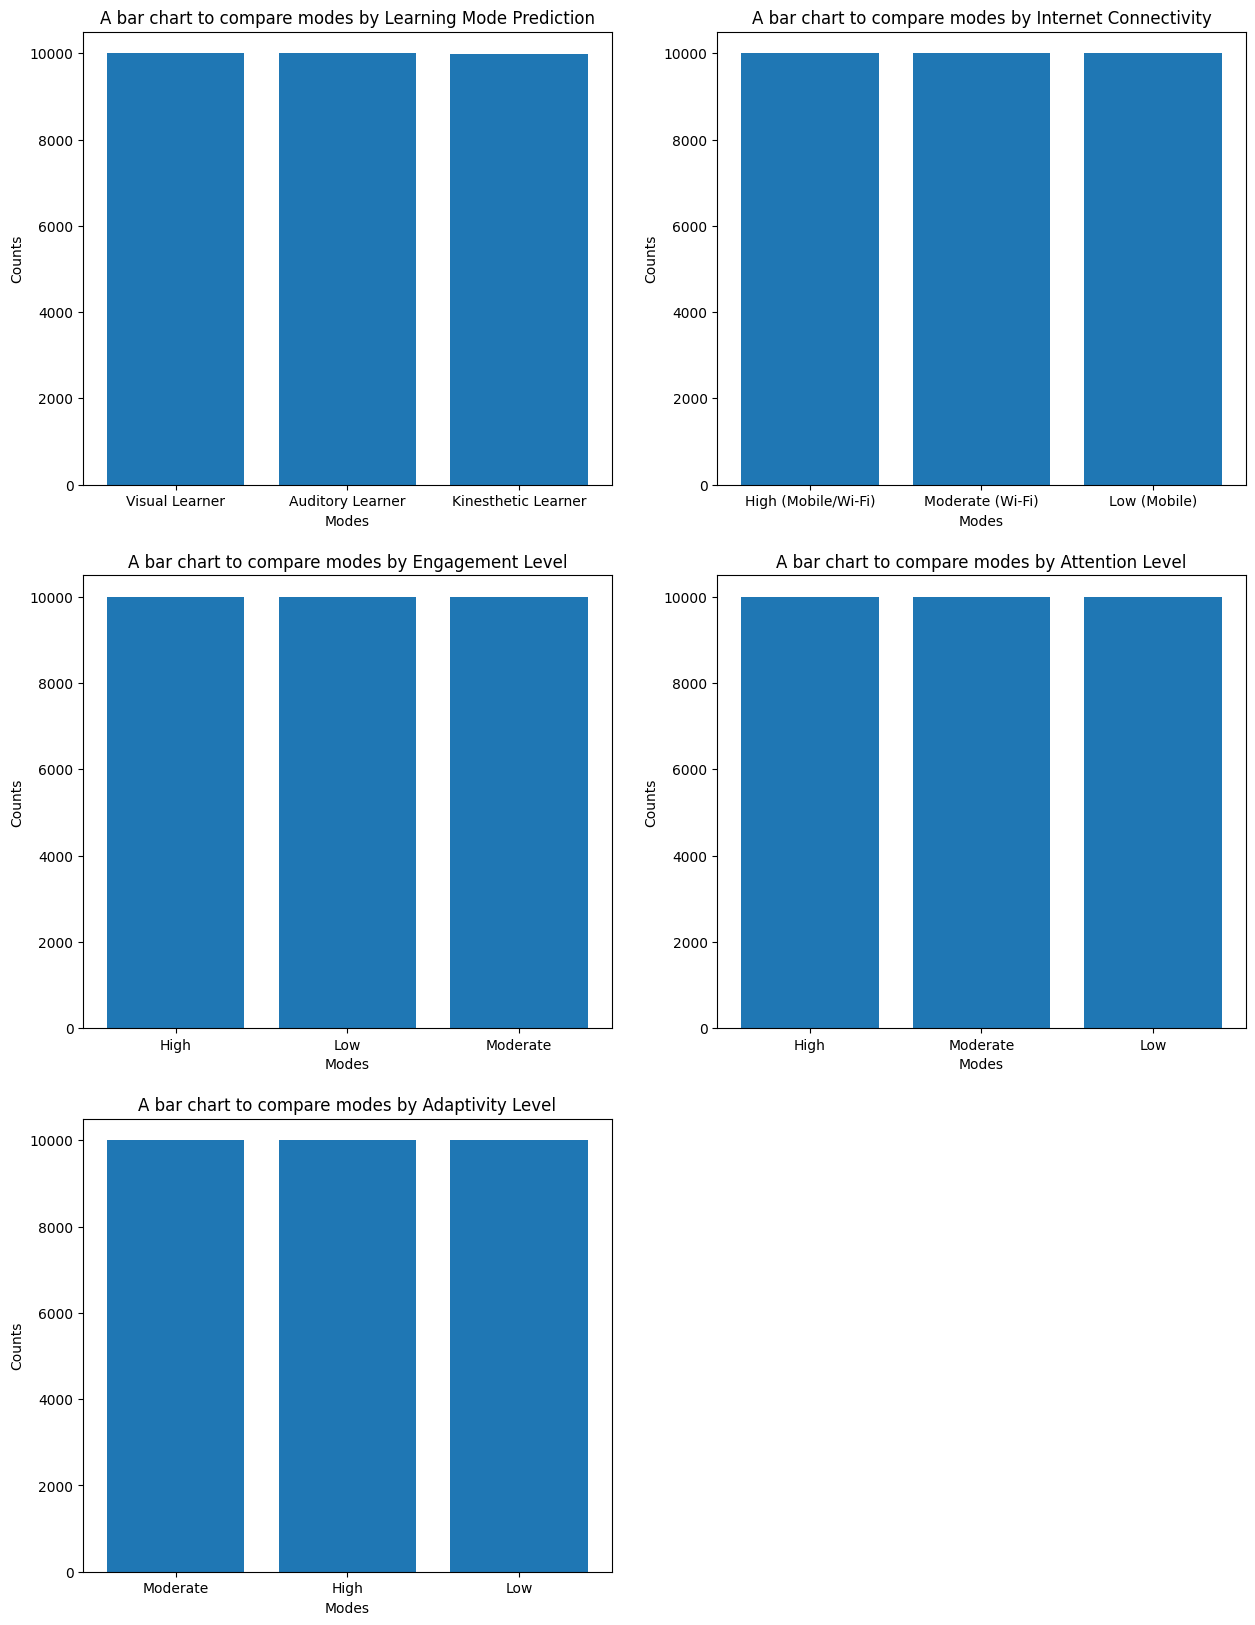

In [46]:
plt.close()
plt.figure(figsize=(15, 20))


plt.subplot(3,2,1)
plt.bar(data['Learning Mode Prediction'] , data['Student ID'])
plt.title('A bar chart to compare modes by Learning Mode Prediction')
plt.xlabel('Modes')
plt.ylabel('Counts')



plt.subplot(3,2,2)
plt.bar(data['Internet Connectivity'] , data['Student ID'])
plt.title('A bar chart to compare modes by Internet Connectivity')
plt.xlabel('Modes')
plt.ylabel('Counts')



plt.subplot(3,2,3)
plt.bar(data['Engagement Level'] , data['Student ID'])
plt.title('A bar chart to compare modes by Engagement Level')
plt.xlabel('Modes')
plt.ylabel('Counts')



plt.subplot(3,2,4)
plt.bar(data['Attention Level'] , data['Student ID'])
plt.title('A bar chart to compare modes by Attention Level')
plt.xlabel('Modes')
plt.ylabel('Counts')



plt.subplot(3,2,5)
plt.bar(data['Adaptivity Level'] , data['Student ID'])
plt.title('A bar chart to compare modes by Adaptivity Level')
plt.xlabel('Modes')
plt.ylabel('Counts')
plt.show()

## Group by date and calculate average Attention Level and Engagement Level.

In [37]:
def masking(value):
    if value == 'Low':
        return 1
    elif value == 'Moderate':
        return 2
    elif value == 'High':
        return 3
    else:
        return 0



data['Engagement Level num'] = data['Engagement Level'].apply(masking)
data['Attention Level num'] = data['Attention Level'].apply(masking)
data['Adaptivity Level num'] = data['Adaptivity Level'].apply(masking)

data.drop('Engagement Level' , axis = 1  , inplace = True)
data.drop('Attention Level' , axis = 1  , inplace = True)
data.drop('Adaptivity Level' , axis = 1  , inplace = True)

data.rename(columns = {'Engagement Level num':'Engagement Level'} , inplace = True)
data.rename(columns = {'Attention Level num':'Attention Level'} , inplace = True)
data.rename(columns = {'Adaptivity Level num':'Adaptivity Level'} , inplace = True)

group_by_dated = data.groupby('Date')

group_names = data['Date'].unique().tolist()



mean_dic = {}
for i in group_names:
    for a in range(1,3):
        if a == 1:
            if round(group_by_dated.get_group(i)['Attention Level'].mean().tolist()) == 1:
                check = 'Low'
            elif round(group_by_dated.get_group(i)['Attention Level'].mean().tolist()) == 2:
                check = 'Moderate'
            elif round(group_by_dated.get_group(i)['Attention Level'].mean().tolist()) == 3:
                check = 'High'
            else:
                check = 'Unknown'
            mean_dic[f'{i} Mean Attention Level'] = check
            
        else:
            if round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 1:
                check = 'Low'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 2:
                check = 'Moderate'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 3:
                check = 'High'
            else:
                check = 'Unknown'
            mean_dic[f'{i} Mean Engagement Level'] = check
for key , val in mean_dic.items():
    print(f"{key} : {val}")

2025-01-20 Mean Attention Level : Moderate
2025-01-20 Mean Engagement Level : Moderate
2025-01-10 Mean Attention Level : Moderate
2025-01-10 Mean Engagement Level : Moderate
2025-01-18 Mean Attention Level : Moderate
2025-01-18 Mean Engagement Level : Moderate
2025-01-01 Mean Attention Level : Moderate
2025-01-01 Mean Engagement Level : Moderate
2025-01-11 Mean Attention Level : Moderate
2025-01-11 Mean Engagement Level : Moderate
2025-01-08 Mean Attention Level : Moderate
2025-01-08 Mean Engagement Level : Moderate
2025-01-02 Mean Attention Level : Moderate
2025-01-02 Mean Engagement Level : Moderate
2025-01-06 Mean Attention Level : Moderate
2025-01-06 Mean Engagement Level : Moderate
2025-01-21 Mean Attention Level : Moderate
2025-01-21 Mean Engagement Level : Moderate
2025-01-24 Mean Attention Level : Moderate
2025-01-24 Mean Engagement Level : Moderate
2025-01-25 Mean Attention Level : Moderate
2025-01-25 Mean Engagement Level : Moderate
2025-01-05 Mean Attention Level : Moderate


## Group by learning_mode and compute average engagement.

In [40]:
group_by_dated = data.groupby('Learning Mode Prediction')

group_names = data['Learning Mode Prediction'].unique().tolist()



mean_dic = {}
for i in group_names:
 
            if round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 1:
                check = 'Low'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 2:
                check = 'Moderate'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 3:
                check = 'High'
            else:
                check = 'Unknown'
            mean_dic[f'{i} Mean Engagement Level'] = check
for key , val in mean_dic.items():
    print(f"{key} : {val}")

Visual Learner Mean Engagement Level : Moderate
Auditory Learner Mean Engagement Level : Moderate
Kinesthetic Learner Mean Engagement Level : Moderate
